## 1. Import libraries, test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## 2. Generate interpolation expected prediction values

The interpolated x-points should be the mean of the 2 points.

In [2]:
x_test = []

for i in range(0, len(x) - 1):
    x_test.append(((x[i] + x[i + 1]) / 2.0).tolist())

## 2. Apply Feature scaling

This is minimize the feature value so that it'll not only be easier to work with and the data prediction comes out more accurately.

In [3]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x_test = sc_x.transform(x_test)

sc_y = StandardScaler()
y = y.reshape(len(y),1)
y = sc_y.fit_transform(y)

## 3. Training the SVR model

In [4]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(x, np.ravel(y))

SVR()

## 5. Displaying the graph and details

The green line is the estimated hyperplane, and the red lines are the estimated decision boundaries. The red circles (with holes) are the support vectors, and both the red circles and the blue circles are the x-values with the actual respective y-value. The green circles are the predicted y-values for the interpolated x-values.

Notice how the green circles are within the decision boundaries.

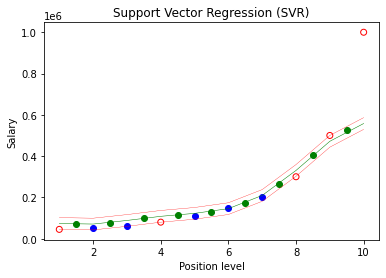

Epsilon:  0.1
C parameter:  1.0 

    x-value  y-predicted-value  y-value-is-true
0       1.0           45000.00                1
1       1.5           68690.62                0
2       2.0           50000.00                1
3       2.5           78074.30                0
4       3.0           60000.00                1
5       3.5           98851.54                0
6       4.0           80000.00                1
7       4.5          115841.63                0
8       5.0          110000.00                1
9       5.5          131106.77                0
10      6.0          150000.00                1
11      6.5          170370.02                0
12      7.0          200000.00                1
13      7.5          263740.85                0
14      8.0          300000.00                1
15      8.5          403162.82                0
16      9.0          500000.00                1
17      9.5          525887.86                0
18     10.0         1000000.00                1


In [5]:
from itertools import zip_longest, chain

epsilon = model.get_params()['epsilon']
c_param = model.get_params()['C']
kernel = model.get_params()['kernel']

x_predicted = model.predict(x)
x_test_predicted = model.predict(x_test)

# Non-support vectors
plt.scatter(
    sc_x.inverse_transform([v for v in x if v not in model.support_vectors_]),
    sc_y.inverse_transform([v for i, v in enumerate(y) if i not in model.support_]),
    color = 'blue')
# Support vectors
plt.scatter(
    sc_x.inverse_transform([v for v in model.support_vectors_]),
    sc_y.inverse_transform([y[i] for i in model.support_]),
    facecolors='none', 
    edgecolors='red')
# Predicted interpolated values
plt.scatter(
    sc_x.inverse_transform(x_test), 
    sc_y.inverse_transform(model.predict(x_test)), 
    color='green')

# Upper decision boundary
plt.plot(
    sc_x.inverse_transform(x), 
    sc_y.inverse_transform([i + epsilon for i in x_predicted]), 
    color='red', linewidth='0.3')
# Lower decision boundary
plt.plot(
    sc_x.inverse_transform(x), 
    sc_y.inverse_transform([i - epsilon for i in x_predicted]), 
    color='red', linewidth='0.3')
# Hyperplane
plt.plot(
    sc_x.inverse_transform(x), 
    sc_y.inverse_transform(x_predicted), 
    linewidth='0.5', color = 'green')

plt.title('Support Vector Regression (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

print('Epsilon: ', epsilon)
print('C parameter: ', c_param, '\n')

df = pd.DataFrame(sorted(list(map(lambda a: [np.round(a[0][0], 2), np.round(a[1], 2)], chain(
    zip_longest(sc_x.inverse_transform(x_test), sc_y.inverse_transform(x_test_predicted)),
    zip_longest(sc_x.inverse_transform(x), [a[0] for a in sc_y.inverse_transform(y)])
)))), columns=['x-value', 'y-predicted-value'])

df['y-value-is-true'] = (df['x-value'] % 1 == 0).astype(int)

print(df)